In [2]:
import os
import tensorflow as tf
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
gpu_options = tf.GPUOptions(allow_growth=True)
sess_config = tf.ConfigProto(gpu_options=gpu_options)
tf.keras.backend.set_session(tf.Session(config=sess_config))

In [3]:
import os
import glob
#import tqdm
import numpy as np
#import pandas as pd
import multiprocessing
import pydicom as dicom
import nibabel as nib
#from keras import utils as kutils
from matplotlib import pyplot as plt

def load_image(label_fpath, transpose=False):
    #encode_name = label_fpath[-39: -7]
    label_data = nib.load(label_fpath)
    label_array = label_data.get_fdata()
    if transpose:
        label_array = np.transpose(label_array, axes=(2, 1, 0))
    return  label_array#, encode_name

In [4]:
import pandas as pd
info = pd.read_csv('/data2/pancreas/Nifti_data/data_list.csv')
image_path = "/data2/pancreas/Nifti_data/image"
label_path = "/data2/pancreas/Nifti_data/label"


resec = np.load("resec.npy")
y = np.load("resec_y.npy")


In [5]:
shape_tumor = np.load("shape_tumor.npy")

# Mask to npz

In [12]:
shape_tumor[0, :]

array([126., 154., 233., 256.,  70.,  71.])

In [9]:
ls ./npz/tumor_mask_images/

In [4]:
import os
tumor_mask_npz_folder = './npz/tumor_mask_images/'

# if not os.path.exists(tumor_mask_npz_folder):
#     os.makedirs(tumor_mask_npz_folder)

In [115]:

encode = resec[0]
volume_image = load_image(os.path.join(image_path, "IM_"+encode+".nii.gz"))
label = load_image(os.path.join(label_path, "LB_"+encode+".nii.gz"))
# num_slice = volume_image.shape[2]
# for _z in range(0, num_slice):
#     volume_image[..., _z] = masking(label[..., _z], volume_image[..., _z])


# volume_image = extract_cube(shape_tumor[i, :], volume_image) 

In [96]:
shape_tumor[0, :][2]

233.0

In [116]:
volume_image = extract_cube(shape_tumor[0, :], volume_image) 
label = extract_cube(shape_tumor[0, :], label)

In [121]:
del volume_image, label

In [119]:
for _z in range(0, 1):
    volume_image[..., _z] = masking(label[..., _z], volume_image[..., _z])


In [122]:
# np.where(label != 0)

In [123]:
# volume_image[..., 0]

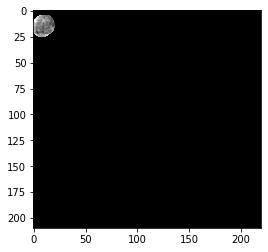

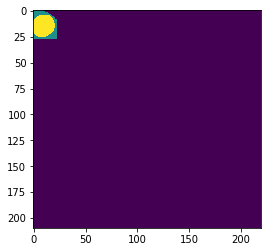

In [120]:
plt.imshow(volume_image[..., 0], cmap = 'gray')
plt.show()
plt.imshow(label[..., 0])
plt.show()

In [61]:
volume_image

(210, 220, 90)

In [127]:
import tqdm
i = 0
for encode in tqdm.tqdm(resec):
    volume_image = load_image(os.path.join(image_path, "IM_"+encode+".nii.gz"))
    label = load_image(os.path.join(label_path, "LB_"+encode+".nii.gz"))
    volume_image = extract_cube(shape_tumor[i, :], volume_image) 
    label = extract_cube(shape_tumor[i, :], label) 
    npz_folder = os.path.join(tumor_mask_npz_folder, encode)
    num_slice = volume_image.shape[2]
    for _z in range(0, num_slice):
        volume_image[..., _z] = masking(label[..., _z], volume_image[..., _z])
        
    i= i+1
    
        
    np.savez_compressed(npz_folder, mask = volume_image)
    print(encode)
    del volume_image, label


  1%|          | 1/182 [00:03<09:35,  3.18s/it]

PC614



  1%|          | 2/182 [00:06<09:24,  3.13s/it]

PC83



  2%|▏         | 3/182 [00:09<09:21,  3.14s/it]

PC139



  2%|▏         | 4/182 [00:12<09:28,  3.19s/it]

PC534



  3%|▎         | 5/182 [00:16<09:41,  3.29s/it]

PC104



  3%|▎         | 6/182 [00:22<12:19,  4.20s/it]

PT51



  4%|▍         | 7/182 [00:25<11:05,  3.80s/it]

PC550



  4%|▍         | 8/182 [00:28<10:51,  3.74s/it]

PC294



  5%|▍         | 9/182 [00:32<10:17,  3.57s/it]

PC605



  5%|▌         | 10/182 [00:35<10:12,  3.56s/it]

PC621



  6%|▌         | 11/182 [00:38<09:29,  3.33s/it]

PC117



  7%|▋         | 12/182 [00:41<09:08,  3.23s/it]

PC335



  7%|▋         | 13/182 [00:44<09:08,  3.25s/it]

PC159



  8%|▊         | 14/182 [00:47<08:58,  3.20s/it]

PC125



  8%|▊         | 15/182 [00:51<09:04,  3.26s/it]

PC647



  9%|▉         | 16/182 [00:55<09:28,  3.42s/it]

PC285



  9%|▉         | 17/182 [00:57<08:56,  3.25s/it]

PC631



 10%|▉         | 18/182 [01:00<08:38,  3.16s/it]

PC160



 10%|█         | 19/182 [01:03<08:14,  3.04s/it]

PC638



 11%|█         | 20/182 [01:10<11:17,  4.18s/it]

PT6



 12%|█▏        | 21/182 [01:13<10:36,  3.95s/it]

PC555



 12%|█▏        | 22/182 [01:17<10:26,  3.92s/it]

PC319



 13%|█▎        | 23/182 [01:21<09:57,  3.76s/it]

PC176



 13%|█▎        | 24/182 [01:24<09:33,  3.63s/it]

PC55



 14%|█▎        | 25/182 [01:27<09:22,  3.58s/it]

PC548



 14%|█▍        | 26/182 [01:31<08:55,  3.43s/it]

PC515



 15%|█▍        | 27/182 [01:34<08:45,  3.39s/it]

PC603



 15%|█▌        | 28/182 [01:37<08:19,  3.24s/it]

PC131



 16%|█▌        | 29/182 [01:40<08:16,  3.24s/it]

PC98



 16%|█▋        | 30/182 [01:43<08:07,  3.21s/it]

PC572



 17%|█▋        | 31/182 [01:46<08:10,  3.25s/it]

PC560



 18%|█▊        | 32/182 [01:53<11:00,  4.40s/it]

PT27



 18%|█▊        | 33/182 [01:57<10:12,  4.11s/it]

PC612



 19%|█▊        | 34/182 [02:00<09:15,  3.75s/it]

PC619



 19%|█▉        | 35/182 [02:03<08:42,  3.56s/it]

PC568



 20%|█▉        | 36/182 [02:06<08:19,  3.42s/it]

PC536



 20%|██        | 37/182 [02:10<08:32,  3.53s/it]

PC301



 21%|██        | 38/182 [02:13<08:15,  3.44s/it]

PC50



 21%|██▏       | 39/182 [02:16<07:51,  3.29s/it]

PC242



 22%|██▏       | 40/182 [02:19<07:43,  3.26s/it]

PC103



 23%|██▎       | 41/182 [02:22<07:35,  3.23s/it]

PC652



 23%|██▎       | 42/182 [02:26<07:30,  3.22s/it]

PC273



 24%|██▎       | 43/182 [02:29<07:37,  3.29s/it]

PC15



 24%|██▍       | 44/182 [02:32<07:34,  3.29s/it]

PC584



 25%|██▍       | 45/182 [02:36<07:38,  3.35s/it]

PC151



 25%|██▌       | 46/182 [02:39<07:39,  3.38s/it]

PC636



 26%|██▌       | 47/182 [02:42<07:29,  3.33s/it]

PC573



 26%|██▋       | 48/182 [02:46<07:33,  3.38s/it]

PC579



 27%|██▋       | 49/182 [02:49<07:18,  3.30s/it]

PC553



 27%|██▋       | 50/182 [02:52<07:14,  3.29s/it]

PC358



 28%|██▊       | 51/182 [02:55<07:02,  3.23s/it]

PC563



 29%|██▊       | 52/182 [02:59<06:56,  3.21s/it]

PC147



 29%|██▉       | 53/182 [03:02<06:56,  3.23s/it]

PC651



 30%|██▉       | 54/182 [03:05<06:57,  3.26s/it]

PC306



 30%|███       | 55/182 [03:08<06:46,  3.20s/it]

PC290



 31%|███       | 56/182 [03:12<06:48,  3.24s/it]

PC618



 31%|███▏      | 57/182 [03:15<06:51,  3.29s/it]

PC574



 32%|███▏      | 58/182 [03:22<08:49,  4.27s/it]

PT2



 32%|███▏      | 59/182 [03:24<07:56,  3.87s/it]

PC1



 33%|███▎      | 60/182 [03:27<07:15,  3.57s/it]

PC575



 34%|███▎      | 61/182 [03:30<06:55,  3.43s/it]

PC97



 34%|███▍      | 62/182 [03:34<06:47,  3.40s/it]

PC630



 35%|███▍      | 63/182 [03:37<06:36,  3.33s/it]

PC595



 35%|███▌      | 64/182 [03:40<06:34,  3.34s/it]

PC542



 36%|███▌      | 65/182 [03:44<06:35,  3.38s/it]

PC556



 36%|███▋      | 66/182 [03:47<06:34,  3.40s/it]

PC72



 37%|███▋      | 67/182 [03:50<06:19,  3.30s/it]

PC116



 37%|███▋      | 68/182 [03:54<06:19,  3.33s/it]

PC537



 38%|███▊      | 69/182 [03:57<06:29,  3.45s/it]

PC387



 38%|███▊      | 70/182 [04:04<07:59,  4.29s/it]

PT4



 39%|███▉      | 71/182 [04:07<07:10,  3.87s/it]

PC653



 40%|███▉      | 72/182 [04:10<06:52,  3.75s/it]

PC246



 40%|████      | 73/182 [04:13<06:37,  3.64s/it]

PC546



 41%|████      | 74/182 [04:17<06:16,  3.49s/it]

PC570



 41%|████      | 75/182 [04:20<06:20,  3.56s/it]

PC115



 42%|████▏     | 76/182 [04:23<05:53,  3.33s/it]

PC616



 42%|████▏     | 77/182 [04:29<07:24,  4.23s/it]

PT52



 43%|████▎     | 78/182 [04:33<06:55,  4.00s/it]

PC143



 43%|████▎     | 79/182 [04:36<06:33,  3.82s/it]

PC650



 44%|████▍     | 80/182 [04:40<06:16,  3.69s/it]

PC513



 45%|████▍     | 81/182 [04:43<05:52,  3.49s/it]

PC278



 45%|████▌     | 82/182 [04:46<05:32,  3.32s/it]

PC252



 46%|████▌     | 83/182 [04:49<05:16,  3.20s/it]

PC541



 46%|████▌     | 84/182 [04:52<05:14,  3.21s/it]

PC348



 47%|████▋     | 85/182 [04:55<05:15,  3.25s/it]

PC622



 47%|████▋     | 86/182 [04:58<05:00,  3.13s/it]

PC38



 48%|████▊     | 87/182 [05:01<05:08,  3.25s/it]

PC181



 48%|████▊     | 88/182 [05:06<05:37,  3.59s/it]

PT37



 49%|████▉     | 89/182 [05:09<05:13,  3.37s/it]

PC110



 49%|████▉     | 90/182 [05:12<04:54,  3.20s/it]

PC304



 50%|█████     | 91/182 [05:15<04:54,  3.24s/it]

PC543



 51%|█████     | 92/182 [05:18<04:54,  3.27s/it]

PC648



 51%|█████     | 93/182 [05:22<04:52,  3.28s/it]

PC589



 52%|█████▏    | 94/182 [05:25<04:47,  3.27s/it]

PC644



 52%|█████▏    | 95/182 [05:28<04:46,  3.29s/it]

PC3



 53%|█████▎    | 96/182 [05:32<04:48,  3.35s/it]

PC5



 53%|█████▎    | 97/182 [05:35<04:40,  3.30s/it]

PC552



 54%|█████▍    | 98/182 [05:38<04:39,  3.33s/it]

PC590



 54%|█████▍    | 99/182 [05:41<04:29,  3.25s/it]

PC251



 55%|█████▍    | 100/182 [05:45<04:30,  3.30s/it]

PC564



 55%|█████▌    | 101/182 [05:47<04:15,  3.16s/it]

PC269



 56%|█████▌    | 102/182 [05:57<06:57,  5.22s/it]

PT7



 57%|█████▋    | 103/182 [06:01<06:05,  4.63s/it]

PC144



 57%|█████▋    | 104/182 [06:04<05:25,  4.17s/it]

PC601



 58%|█████▊    | 105/182 [06:07<05:03,  3.95s/it]

PC63



 58%|█████▊    | 106/182 [06:11<04:48,  3.80s/it]

PC267



 59%|█████▉    | 107/182 [06:18<06:02,  4.83s/it]

PT1



 59%|█████▉    | 108/182 [06:24<06:15,  5.07s/it]

PT13



 60%|█████▉    | 109/182 [06:26<05:22,  4.42s/it]

PC39



 60%|██████    | 110/182 [06:30<04:57,  4.13s/it]

PC105



 61%|██████    | 111/182 [06:33<04:31,  3.82s/it]

PC634



 62%|██████▏   | 112/182 [06:36<04:19,  3.70s/it]

PC539



 62%|██████▏   | 113/182 [06:40<04:09,  3.62s/it]

PC31



 63%|██████▎   | 114/182 [06:43<04:01,  3.55s/it]

PC639



 63%|██████▎   | 115/182 [06:46<03:42,  3.33s/it]

PC41



 64%|██████▎   | 116/182 [06:50<03:41,  3.36s/it]

PC152



 64%|██████▍   | 117/182 [06:53<03:33,  3.29s/it]

PC538



 65%|██████▍   | 118/182 [06:56<03:31,  3.30s/it]

PC561



 65%|██████▌   | 119/182 [07:00<03:34,  3.41s/it]

PC554



 66%|██████▌   | 120/182 [07:03<03:35,  3.48s/it]

PC96



 66%|██████▋   | 121/182 [07:06<03:20,  3.29s/it]

PC623



 67%|██████▋   | 122/182 [07:10<03:22,  3.37s/it]

PC166



 68%|██████▊   | 123/182 [07:14<03:32,  3.60s/it]

PT9



 68%|██████▊   | 124/182 [07:17<03:28,  3.59s/it]

PC27



 69%|██████▊   | 125/182 [07:20<03:13,  3.39s/it]

PC295



 69%|██████▉   | 126/182 [07:24<03:10,  3.39s/it]

PC582



 70%|██████▉   | 127/182 [07:27<03:04,  3.35s/it]

PC549



 70%|███████   | 128/182 [07:31<03:06,  3.46s/it]

PC585



 71%|███████   | 129/182 [07:34<02:53,  3.28s/it]

PC332



 71%|███████▏  | 130/182 [07:40<03:45,  4.33s/it]

PT12



 72%|███████▏  | 131/182 [07:48<04:29,  5.29s/it]

PT59



 73%|███████▎  | 132/182 [07:51<03:50,  4.60s/it]

PC581



 73%|███████▎  | 133/182 [07:54<03:22,  4.12s/it]

PC336



 74%|███████▎  | 134/182 [07:57<02:59,  3.74s/it]

PC89



 74%|███████▍  | 135/182 [08:00<02:46,  3.54s/it]

PC580



 75%|███████▍  | 136/182 [08:03<02:40,  3.50s/it]

PC567



 75%|███████▌  | 137/182 [08:09<03:13,  4.30s/it]

PT53



 76%|███████▌  | 138/182 [08:13<02:54,  3.96s/it]

PC170



 76%|███████▋  | 139/182 [08:16<02:41,  3.75s/it]

PC107



 77%|███████▋  | 140/182 [08:19<02:34,  3.69s/it]

PC134



 77%|███████▋  | 141/182 [08:23<02:26,  3.58s/it]

PC596



 78%|███████▊  | 142/182 [08:26<02:22,  3.55s/it]

PC79



 79%|███████▊  | 143/182 [08:30<02:16,  3.50s/it]

PC629



 79%|███████▉  | 144/182 [08:33<02:14,  3.55s/it]

PC322



 80%|███████▉  | 145/182 [08:37<02:08,  3.48s/it]

PC130



 80%|████████  | 146/182 [08:40<02:01,  3.37s/it]

PC350



 81%|████████  | 147/182 [08:47<02:35,  4.45s/it]

PT39



 81%|████████▏ | 148/182 [08:50<02:17,  4.03s/it]

PC78



 82%|████████▏ | 149/182 [08:53<02:04,  3.77s/it]

PC58



 82%|████████▏ | 150/182 [08:56<01:52,  3.51s/it]

PC42



 83%|████████▎ | 151/182 [09:02<02:14,  4.33s/it]

PT8



 84%|████████▎ | 152/182 [09:05<01:59,  4.00s/it]

PC259



 84%|████████▍ | 153/182 [09:08<01:48,  3.74s/it]

PC551



 85%|████████▍ | 154/182 [09:12<01:41,  3.61s/it]

PC37



 85%|████████▌ | 155/182 [09:15<01:38,  3.66s/it]

PC70



 86%|████████▌ | 156/182 [09:19<01:32,  3.57s/it]

PC2



 86%|████████▋ | 157/182 [09:26<01:59,  4.80s/it]

PT35



 87%|████████▋ | 158/182 [09:30<01:42,  4.29s/it]

PC91



 87%|████████▋ | 159/182 [09:32<01:27,  3.83s/it]

PC303



 88%|████████▊ | 160/182 [09:35<01:20,  3.64s/it]

PC600



 88%|████████▊ | 161/182 [09:39<01:13,  3.50s/it]

PC510



 89%|████████▉ | 162/182 [09:42<01:09,  3.46s/it]

PC544



 90%|████████▉ | 163/182 [09:45<01:04,  3.38s/it]

PC545



 90%|█████████ | 164/182 [09:49<01:02,  3.48s/it]

PC123



 91%|█████████ | 165/182 [09:52<00:58,  3.43s/it]

PC54



 91%|█████████ | 166/182 [09:56<00:54,  3.42s/it]

PC559



 92%|█████████▏| 167/182 [09:59<00:51,  3.40s/it]

PC535



 92%|█████████▏| 168/182 [10:02<00:45,  3.23s/it]

PC277



 93%|█████████▎| 169/182 [10:07<00:50,  3.90s/it]

PT42



 93%|█████████▎| 170/182 [10:13<00:54,  4.57s/it]

PT47



 94%|█████████▍| 171/182 [10:16<00:44,  4.08s/it]

PC349



 95%|█████████▍| 172/182 [10:19<00:37,  3.79s/it]

PC40



 95%|█████████▌| 173/182 [10:22<00:31,  3.51s/it]

PC256



 96%|█████████▌| 174/182 [10:26<00:27,  3.48s/it]

PC627



 96%|█████████▌| 175/182 [10:29<00:23,  3.37s/it]

PC602



 97%|█████████▋| 176/182 [10:32<00:20,  3.36s/it]

PC607



 97%|█████████▋| 177/182 [10:38<00:20,  4.10s/it]

PT49



 98%|█████████▊| 178/182 [10:44<00:19,  4.78s/it]

PT14



 98%|█████████▊| 179/182 [10:52<00:16,  5.52s/it]

PT44



 99%|█████████▉| 180/182 [10:55<00:09,  4.76s/it]

PC615



 99%|█████████▉| 181/182 [10:57<00:04,  4.19s/it]

PC613



100%|██████████| 182/182 [11:04<00:00,  4.81s/it]

PT46


In [155]:

img_t = np.load(os.path.join(tumor_mask_npz_folder, resec[10]+".npz"))

In [156]:
img_t = img_t["mask"]

In [157]:
img_t.shape

(210, 220, 90)

In [128]:
# np.where(img_t != 0)

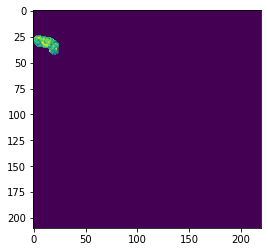

In [158]:
plt.imshow(img_t[..., 0])
del img_t

In [6]:
#New
def extract_cube(r, img):#cube 210, 220, 90 ;; ranges = [xmin, xmax, ymin, ymax, zmin, zmax]
    img_tmp = np.zeros((210, 220, 90))
    #print(img.shape, r)
    img_tmp[:int(r[1]-r[0]), :int(r[3]-r[2]), :int(r[5]-r[4])] = img[int(r[0]):int(r[1]), int(r[2]):int(r[3]), int(r[4]):int(r[5])]
    return img_tmp

In [7]:
def masking(label, img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if label[i, j] == 0 or label[i, j] == 1:
                img[i, j] = 0
    return img





In [8]:
import pandas as pd
map_df = pd.DataFrame(data={'resec_name': resec, 'shape': np.array(range(182)), 'target':y.reshape(182)})

In [16]:
shape_tumor

array([[126., 154., 233., 256.,  70.,  71.],
       [242., 328., 238., 338.,  25.,  33.],
       [196., 280., 271., 336.,  65.,  72.],
       ...,
       [250., 315., 291., 340.,  19.,  27.],
       [255., 271., 336., 358.,  23.,  23.],
       [121., 266., 200., 339., 244., 302.]])

In [11]:
from keras.utils import to_categorical

class resec_Generator1(kutils.Sequence):
    'Generates data for Keras'
    def __init__(self, mapping_df, batch_size, shuffle=True):
        'Initialization'
        self.mapping_df = mapping_df
        self.data_num   = mapping_df.shape[0]
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(self.data_num / self.batch_size))


    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        #print("enter0")
        batch_mapping_df = \
            self.mapping_df.iloc[index*self.batch_size: (index+1)*self.batch_size]

        # Generate data
        X, y = self.__data_generation(batch_mapping_df)
        return X, y


    def on_epoch_end(self):
        'Updates indexes after each epoch'
        if self.shuffle:
            self.mapping_df = self.mapping_df.sample(frac=1).reset_index(drop=True)
            
    def __data_generation(self, batch_mapping_df):
        'Generates data containing batch_size samples' 
        # Initialization
        X = np.zeros((  self.batch_size, 210, 220, 90, 1)) 

        y = np.zeros((self.batch_size))

        # Generate data
        cnt = 0
        
        for i, row in batch_mapping_df.iterrows():
            #img = extract_cube(shape_tumor[row['shape']], load_image(os.path.join(image_path, "IM_"+row['resec_name']+".nii.gz")))
            encode = row['resec_name']
            volume_image = load_image(os.path.join(image_path, "IM_"+encode+".nii.gz"))
            label = load_image(os.path.join(label_path, "LB_"+encode+".nii.gz"))
            volume_image1 = extract_cube(shape_tumor[row['shape'], :], volume_image) 
            label1 = extract_cube(shape_tumor[row['shape'], :], label) 
            num_slice = volume_image1.shape[2]
            for _z in range(0, num_slice):
                volume_image1[..., _z] = masking(label1[..., _z], volume_image1[..., _z])

            #print(encode)
            X[ cnt, :, :, :, 0] = volume_image1
            del volume_image1, label1, volume_image, label
            #img = clip_img(load_image(os.path.join(image_path, "IM_"+row['resec_name']+".nii.gz")))
            #print("resec_name =", row['resec_name'])
#             for j in range(40):
#                 #print("img shape =", img.shape)
#                 #print("j =", j)
#                 X[j][cnt, :, :, :, 0] = extract_cube(img, j)
            y[cnt] = row['target']

#             position = extract_position(row['ref_idx'], row['point_idx'])
#             tmp_cube = extract_cube(position, row['ref_idx'])
#             if (tmp_cube.shape == (19, 19, 19)):
#                 X[cnt, :, :, :, 0] = extract_cube(position, row['ref_idx'])
#             else:
#                 X[cnt, :, :, :, 0] = np.zeros((19, 19, 19))
#             y_idx = row['y_idx']
#             radius = ref[row['ref_idx']][row['point_idx'], 3]
#             y1[cnt, y_idx] = 1
#             y2[cnt, 0] = radius
            cnt += 1
        #print(X[5])
        return X, y

# for name in resec:
#     img = load_image(os.path.join(image_path, "IM_"+name+".nii.gz"))

In [10]:
from keras.models import Model#, load_model
from keras import layers as klayers
from keras.optimizers import Adam
from keras import utils as kutils
from keras import backend as K
from keras.callbacks import ModelCheckpoint



from keras.layers import Conv3D, MaxPool3D, Flatten, Dense
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
#from plotly.offline import iplot, init_notebook_mode
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta
#import plotly.graph_objs as go
from matplotlib.pyplot import cm
from keras.models import Model
import numpy as np
import keras
import h5py

#init_notebook_mode(connected=True)
%matplotlib inline


from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, concatenate,  MaxPool2D
# from keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D, Lambda
from keras.layers.advanced_activations import LeakyReLU, ReLU
from keras.layers.convolutional import UpSampling2D, Conv2D, Conv1D
from keras.models import Sequential, Model
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical
import keras.backend as K
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector, Reshape
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline



In [14]:
from keras import metrics
tmp_x = Input((210, 220, 90, 1))
x = Conv3D(filters=32, dilation_rate=1, kernel_size=(3, 3, 3), activation='relu')(tmp_x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = MaxPool3D()(x)

x = Conv3D(filters=16, dilation_rate=1, kernel_size=(3, 3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = MaxPool3D()(x)

x = Conv3D(filters=8, dilation_rate=1, kernel_size=(3, 3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool3D()(x)



x = Conv3D(filters=4, dilation_rate=1, kernel_size=(3, 3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool3D()(x)






x = Flatten()(x)
x = Dense(units=500, kernel_initializer='normal', activation='elu')(x)
x = Dense(units=100, kernel_initializer='normal', activation='relu')(x)
x = Dense(units=1, kernel_initializer='normal', activation='sigmoid')(x)

model = Model(inputs=tmp_x, outputs=x)
adam_lr = 0.0002
adam_beta_1 = 0.5
model.compile(optimizer=Adam(lr=adam_lr, beta_1=adam_beta_1),
              loss='binary_crossentropy', metrics = [metrics.binary_accuracy])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 210, 220, 90, 1)   0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 208, 218, 88, 32)  896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 208, 218, 88, 32)  128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 208, 218, 88, 32)  0         
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 104, 109, 44, 32)  0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 102, 107, 42, 16)  13840     
_________________________________________________________________
batch_normalization_2 (Batch (None, 102, 107, 42, 16)  64        
__________

In [15]:
batch_size = 1
v_generator = resec_Generator1(map_df[:-50], batch_size=batch_size)
validation_generator = resec_Generator1(map_df[-50:-30], batch_size=batch_size)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [17]:
history = model.fit_generator(v_generator,
                              epochs=100, validation_data=validation_generator)

Epoch 1/100
132/132 [==============================] - 531s 4s/step - loss: 0.4524 - binary_accuracy: 0.7879 - val_loss: 0.5533 - val_binary_accuracy: 0.5500
Epoch 2/100
132/132 [==============================] - 535s 4s/step - loss: 0.4147 - binary_accuracy: 0.8106 - val_loss: 0.5723 - val_binary_accuracy: 0.7500
Epoch 3/100
132/132 [==============================] - 510s 4s/step - loss: 0.3881 - binary_accuracy: 0.8258 - val_loss: 0.5426 - val_binary_accuracy: 0.5500
Epoch 4/100
132/132 [==============================] - 503s 4s/step - loss: 0.3550 - binary_accuracy: 0.8485 - val_loss: 0.5502 - val_binary_accuracy: 0.6000
Epoch 5/100
132/132 [==============================] - 516s 4s/step - loss: 0.3893 - binary_accuracy: 0.8030 - val_loss: 0.5371 - val_binary_accuracy: 0.6000
Epoch 6/100
132/132 [==============================] - 490s 4s/step - loss: 0.2994 - binary_accuracy: 0.8712 - val_loss: 0.5148 - val_binary_accuracy: 0.6500
Epoch 7/100
132/132 [==============================]

132/132 [==============================] - 524s 4s/step - loss: 0.0367 - binary_accuracy: 0.9697 - val_loss: 0.5864 - val_binary_accuracy: 0.7500
Epoch 54/100
132/132 [==============================] - 513s 4s/step - loss: 0.0427 - binary_accuracy: 0.9773 - val_loss: 0.5724 - val_binary_accuracy: 0.7500
Epoch 55/100
132/132 [==============================] - 520s 4s/step - loss: 0.0431 - binary_accuracy: 0.9773 - val_loss: 0.6081 - val_binary_accuracy: 0.7500
Epoch 56/100
132/132 [==============================] - 511s 4s/step - loss: 0.0701 - binary_accuracy: 0.9924 - val_loss: 0.6163 - val_binary_accuracy: 0.7500
Epoch 57/100
132/132 [==============================] - 520s 4s/step - loss: 0.0606 - binary_accuracy: 0.9773 - val_loss: 0.5981 - val_binary_accuracy: 0.6000
Epoch 58/100
132/132 [==============================] - 506s 4s/step - loss: 0.0361 - binary_accuracy: 0.9924 - val_loss: 0.5497 - val_binary_accuracy: 0.7500
Epoch 59/100
132/132 [==============================] - 512

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])


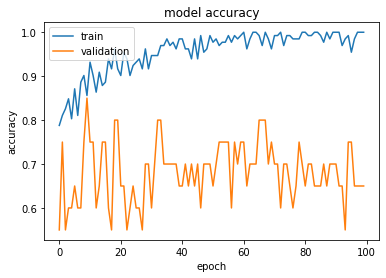

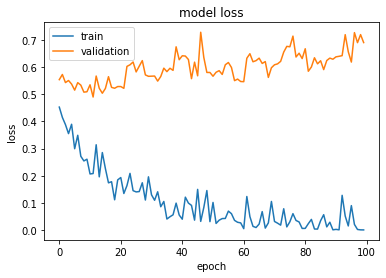

In [18]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [33]:
history2 = model.fit_generator(v_generator,
                              epochs=5, validation_data=validation_generator)

Epoch 1/5
132/132 [==============================] - 547s 4s/step - loss: 0.1716 - binary_accuracy: 0.9318 - val_loss: 0.6395 - val_binary_accuracy: 0.6000
Epoch 2/5
132/132 [==============================] - 519s 4s/step - loss: 0.1279 - binary_accuracy: 0.9470 - val_loss: 0.6125 - val_binary_accuracy: 0.6000
Epoch 3/5
132/132 [==============================] - 519s 4s/step - loss: 0.0721 - binary_accuracy: 0.9848 - val_loss: 0.6194 - val_binary_accuracy: 0.6000
Epoch 4/5
132/132 [==============================] - 519s 4s/step - loss: 0.1247 - binary_accuracy: 0.9621 - val_loss: 0.6334 - val_binary_accuracy: 0.6000
Epoch 5/5
132/132 [==============================] - 492s 4s/step - loss: 0.1736 - binary_accuracy: 0.9318 - val_loss: 0.6228 - val_binary_accuracy: 0.6000


dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])


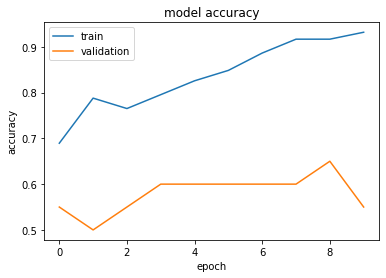

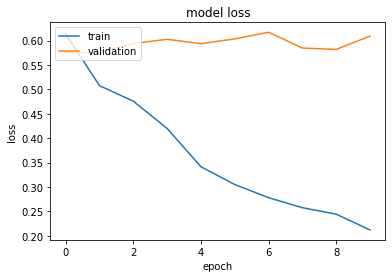

In [34]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])


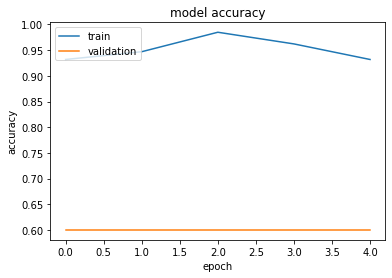

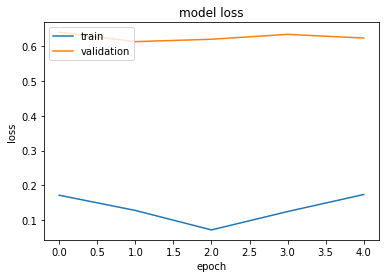

In [36]:
history = history2
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()